In [2]:
from matplotlib import colors
import matplotlib.pyplot as plt
import csv

In [20]:
def plotHist(x,y, n_bins):
    plt.figure(figsize=(20,10))

    # N is the count in each bin, bins is the lower-limit of the bin
    N, bins, patches = plt.hist(x, bins=n_bins)

    # We'll color code by height, but you could use any scalar
    fracs = N / N.max()
    
    # we need to normalize the data to 0..1 for the full range of the colormap
    norm = colors.Normalize(fracs.min(), fracs.max())

    # Now, we'll loop through our objects and set the color of each accordingly
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)

    # We can also normalize our inputs by the total number of counts
    plt.hist(x, bins=n_bins, density=True)

    plt.show()
    
def plot(x, y, peptideID):
    plt.figure(figsize=(20,10))
    plt.plot(x, y, label="Combined Spectrum{}".format(peptideID))
    plt.xlabel('mass')
    plt.ylabel('intensity')
    plt.title("Combined Spectrum{}".format(peptideID))
    plt.legend()
    plt.show()


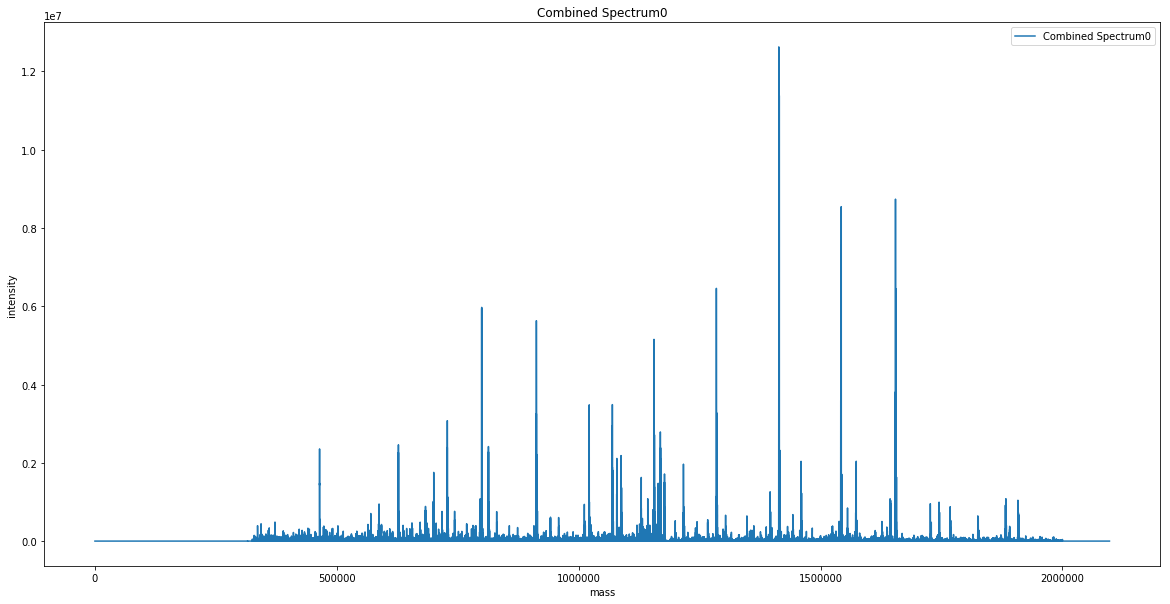

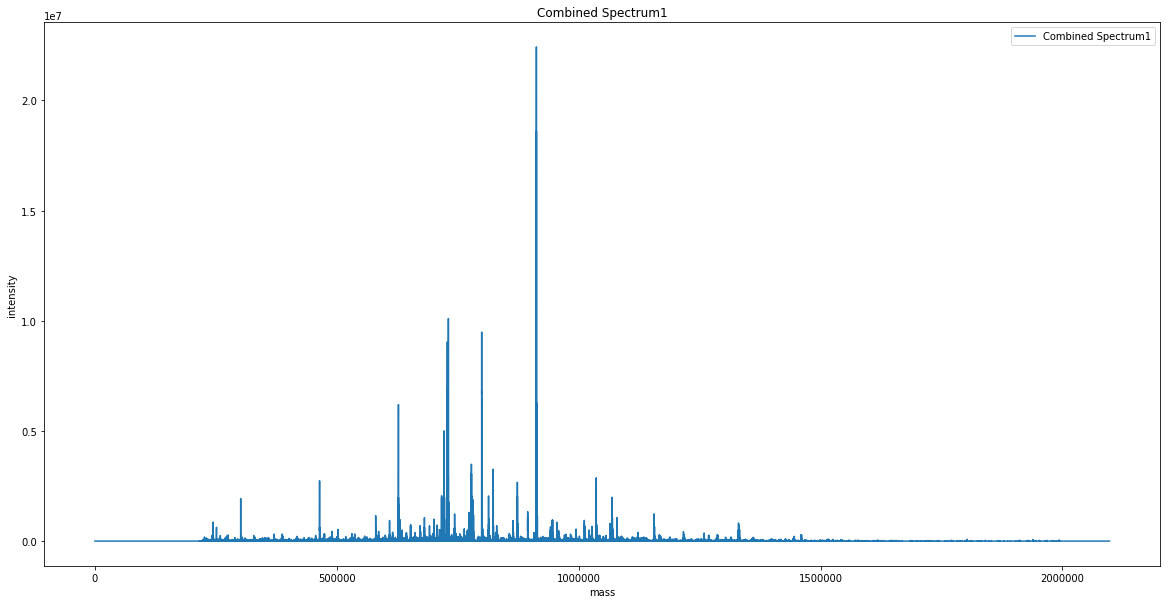

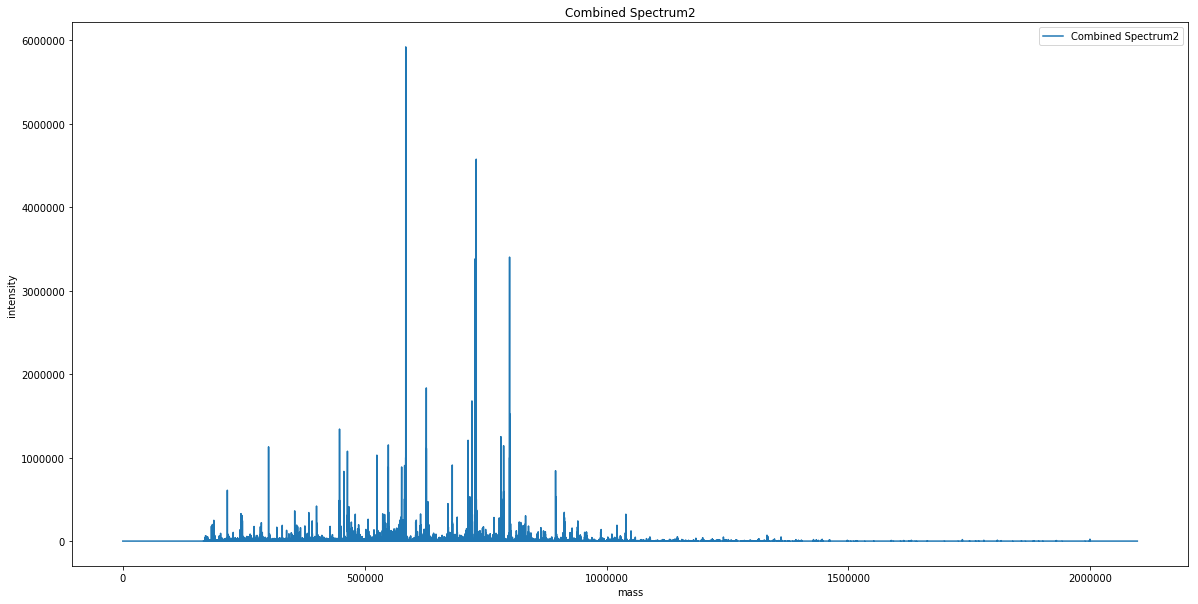

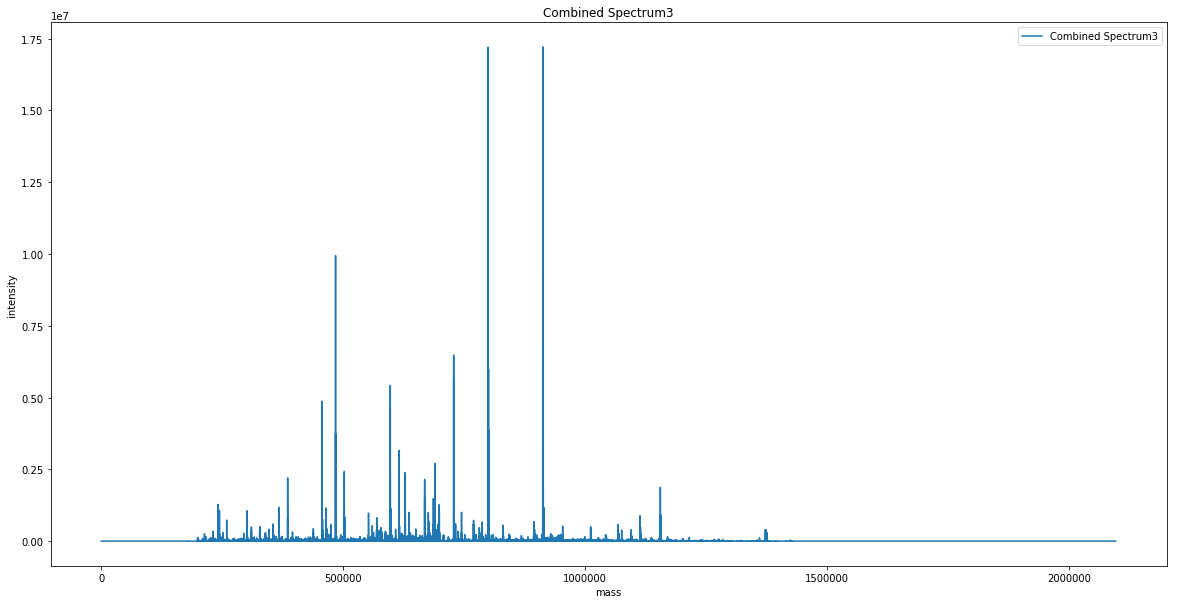

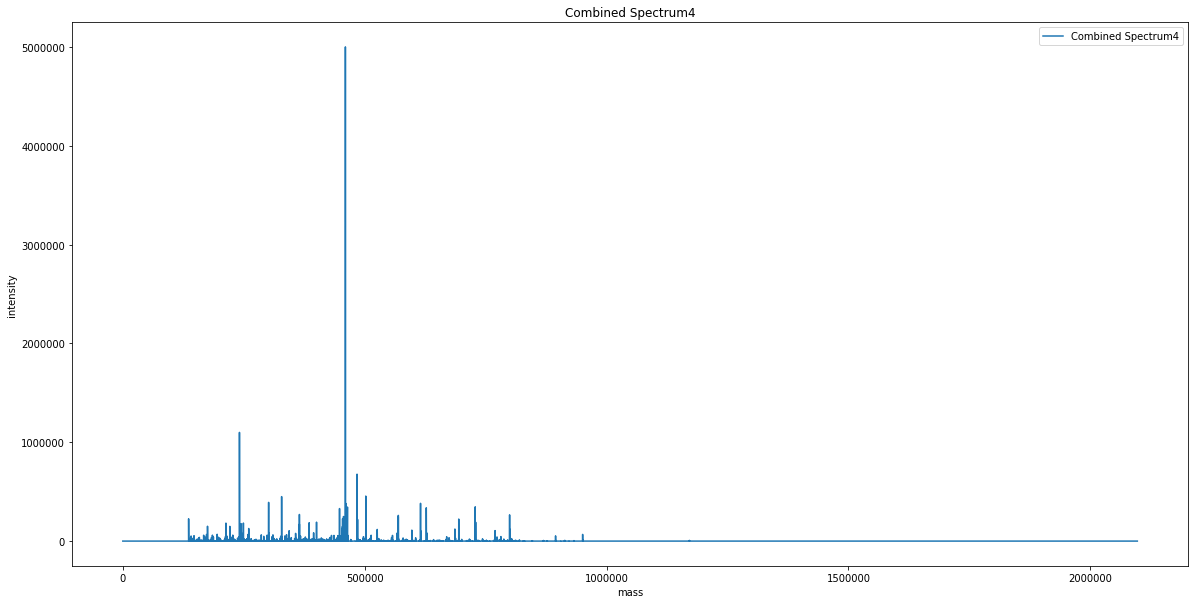

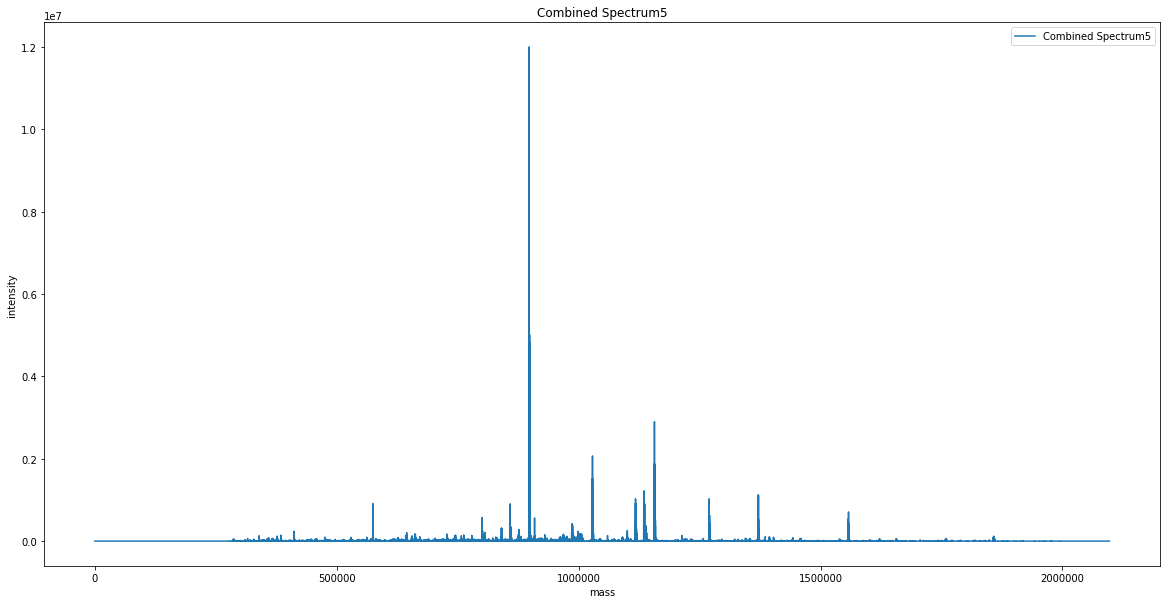

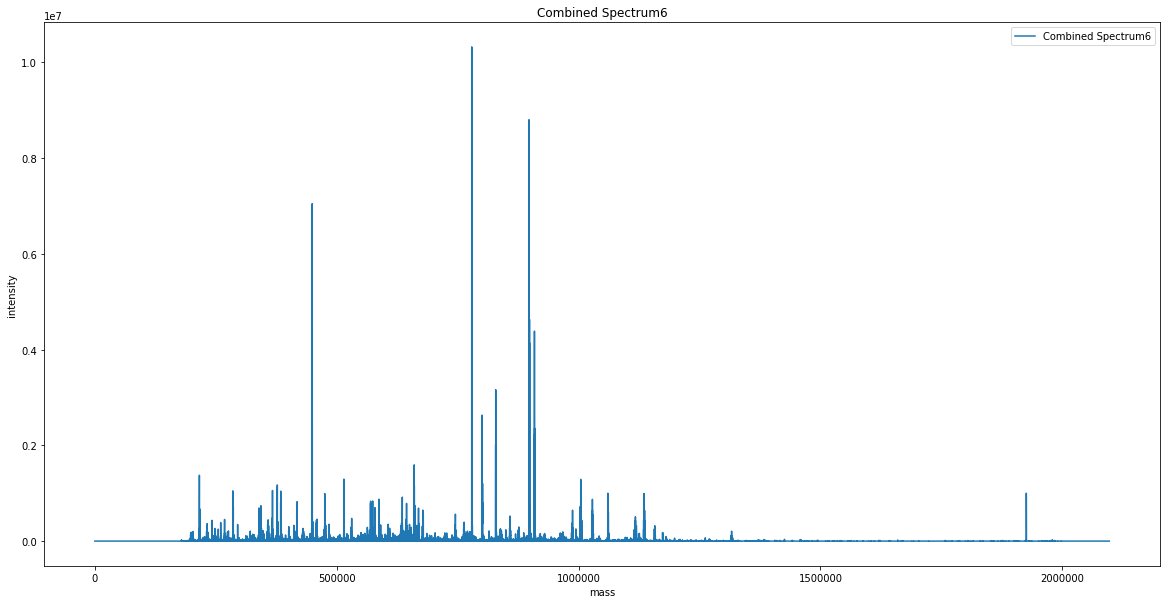

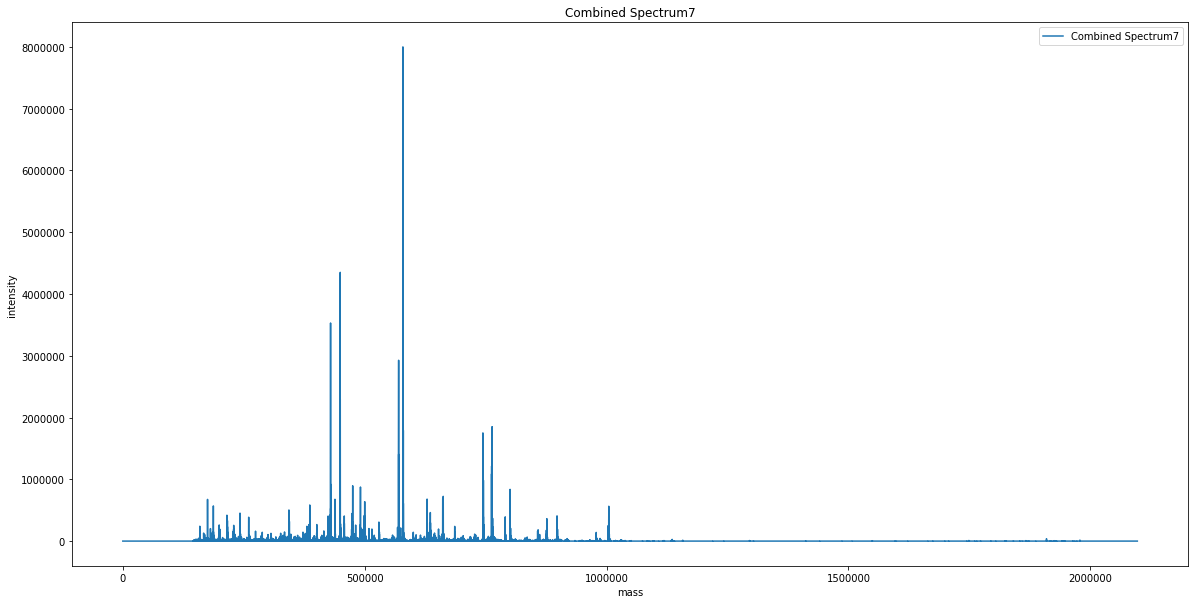

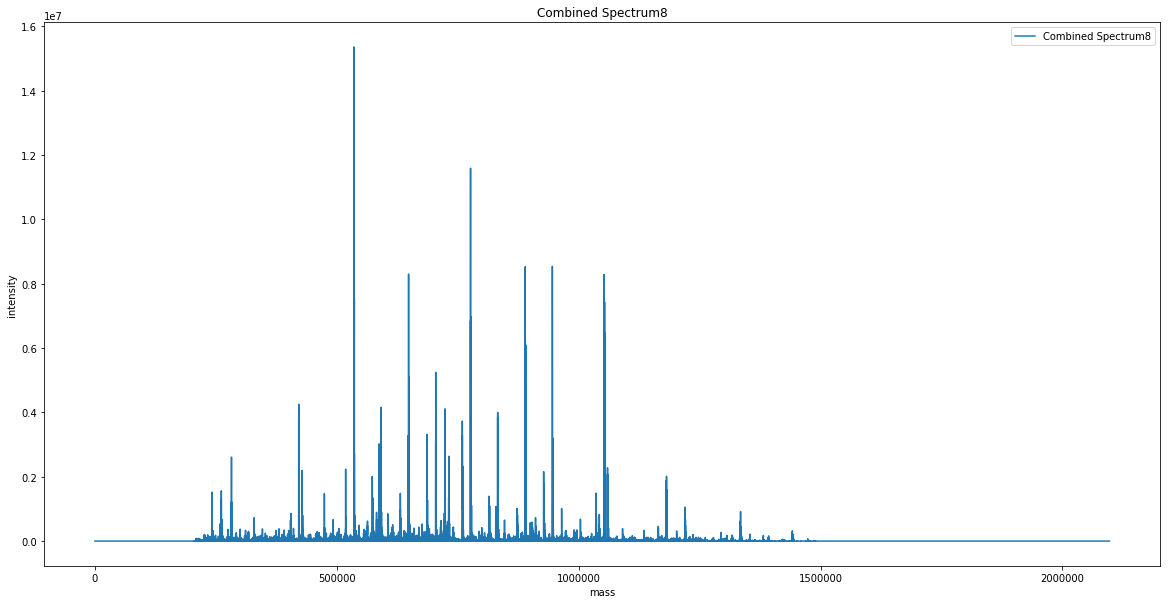

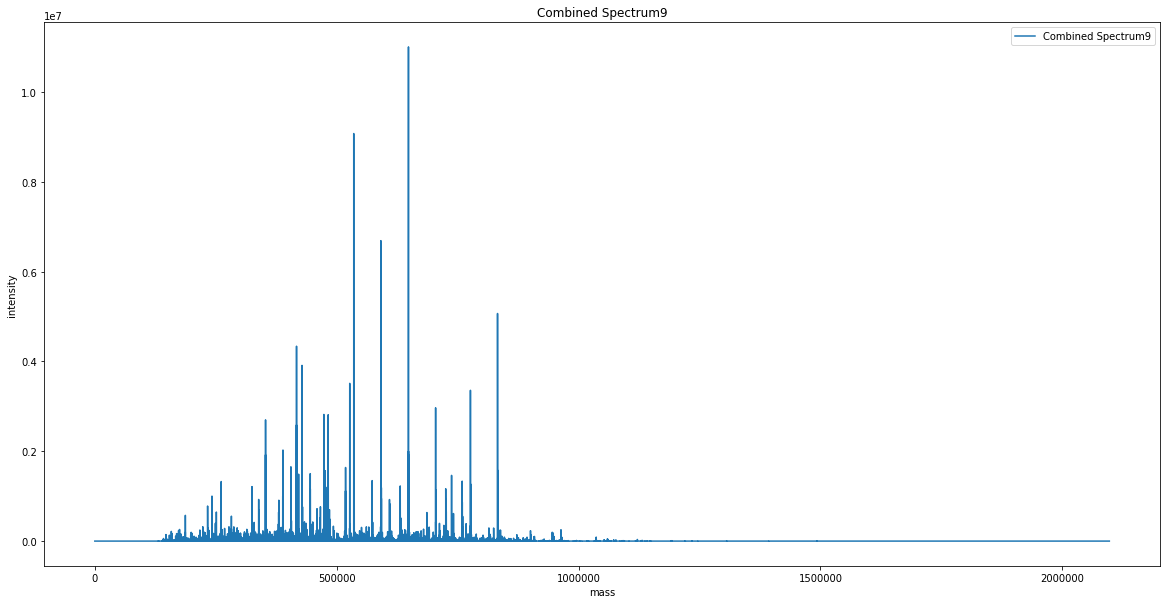

In [21]:
for i in range(10):
    with open('CombinedSpectrum{}.csv'.format(i),'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=',')

        intensity = []
        mass = []
        
        massIndex = 0
        
        for row in plots:

            mass.append(massIndex)
            intensity.append(int(row[0]))
            
            massIndex = massIndex + 1
                        
        #plotHist(mass, intensity, 1000)   
        plot(mass, intensity, i)